> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb Movie

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Dataset Description

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis

1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
pd.set_option("display.max_columns", None)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# Drop row duplicate
df.drop_duplicates(inplace = True)
# Count dataset
df.shape

(10865, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Check total value null
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [7]:
# Drop column containing multiple values null and not use for Question
df.drop(['id', 'imdb_id', 'overview','director','homepage', 'tagline', 'keywords', 'production_companies'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


In [8]:
# Drop value NaN
df.dropna(inplace = True)
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [9]:
# Count dataset
df.shape

(10767, 13)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which genres are most popular from year to year?

In [10]:
# Number genres
df[['genres']].nunique()

genres    2030
dtype: int64

In [11]:
# Number year
df[['release_year']].nunique()

release_year    56
dtype: int64

In [12]:
# df['release_year'].value_counts().sort_values(ascending = True)
release_year = df.groupby('release_year')['release_year'].count().reset_index(name = 'count')
release_year

,release_year,count
0,1960,32
1,1961,31
2,1962,32
3,1963,34
4,1964,42
5,1965,35
6,1966,46
7,1967,39
8,1968,38
9,1969,30


In [13]:
df['genres'].value_counts().sort_values(ascending = False)

Comedy                                            712
Drama                                             711
Drama|Romance                                     289
Comedy|Drama                                      280
Documentary                                       278
Comedy|Romance                                    268
Horror|Thriller                                   259
Horror                                            253
Comedy|Drama|Romance                              222
Drama|Thriller                                    138
Comedy|Family                                     102
Action|Thriller                                   101
Thriller                                           93
Drama|Comedy                                       92
Animation|Family                                   85
Crime|Drama|Thriller                               81
Crime|Drama                                        74
Comedy|Horror                                      72
Drama|Comedy|Romance        

In [14]:
# Define column use for question 1
df_popular = pd.DataFrame(df[['genres', 'release_year', 'popularity']],
                         columns = ['genres', 'release_year', 'popularity']
                         )
df_popular

,genres,release_year,popularity
0,Action|Adventure|Science Fiction|Thriller,2015,32.985763
1,Action|Adventure|Science Fiction|Thriller,2015,28.419936
2,Adventure|Science Fiction|Thriller,2015,13.112507
3,Action|Adventure|Science Fiction|Fantasy,2015,11.173104
4,Action|Crime|Thriller,2015,9.335014
5,Western|Drama|Adventure|Thriller,2015,9.110700
6,Science Fiction|Action|Thriller|Adventure,2015,8.654359
7,Drama|Adventure|Science Fiction,2015,7.667400
8,Family|Animation|Adventure|Comedy,2015,7.404165
9,Comedy|Animation|Family,2015,6.326804


In [15]:
# Groupby release_year and show get popularity max in group
df_popular_gr = df_popular.loc[df.groupby('release_year')['popularity'].idxmax()]
df_popular_gr

,genres,release_year,popularity
10141,Drama|Horror|Thriller,1960,2.610362
10110,Adventure|Animation|Comedy|Family,1961,2.631987
9849,Adventure|Action|Thriller,1962,3.170651
10438,Action|Thriller|Adventure,1963,2.508235
9881,Adventure|Action|Thriller,1964,3.153791
10689,Adventure|Action|Thriller,1965,1.910465
10820,Animation|Family|Comedy,1966,1.227582
10398,Family|Animation|Adventure,1967,2.550704
9719,Science Fiction|Mystery|Adventure,1968,3.309196
10724,Adventure|Action|Thriller,1969,1.778746


In [16]:
# Check row after groupby
df_popular_gr.shape

(56, 3)

In [17]:
# Add new column genres_year
df_popular_gr['genres_year'] = df_popular_gr['genres'] + "("+df_popular_gr['release_year'].astype(str)+")"
# df_popular_gr.sort_values(by = ['release_year'], ascending = True, inplace = True)
df_popular_gr

,genres,release_year,popularity,genres_year
10141,Drama|Horror|Thriller,1960,2.610362,Drama|Horror|Thriller(1960)
10110,Adventure|Animation|Comedy|Family,1961,2.631987,Adventure|Animation|Comedy|Family(1961)
9849,Adventure|Action|Thriller,1962,3.170651,Adventure|Action|Thriller(1962)
10438,Action|Thriller|Adventure,1963,2.508235,Action|Thriller|Adventure(1963)
9881,Adventure|Action|Thriller,1964,3.153791,Adventure|Action|Thriller(1964)
10689,Adventure|Action|Thriller,1965,1.910465,Adventure|Action|Thriller(1965)
10820,Animation|Family|Comedy,1966,1.227582,Animation|Family|Comedy(1966)
10398,Family|Animation|Adventure,1967,2.550704,Family|Animation|Adventure(1967)
9719,Science Fiction|Mystery|Adventure,1968,3.309196,Science Fiction|Mystery|Adventure(1968)
10724,Adventure|Action|Thriller,1969,1.778746,Adventure|Action|Thriller(1969)


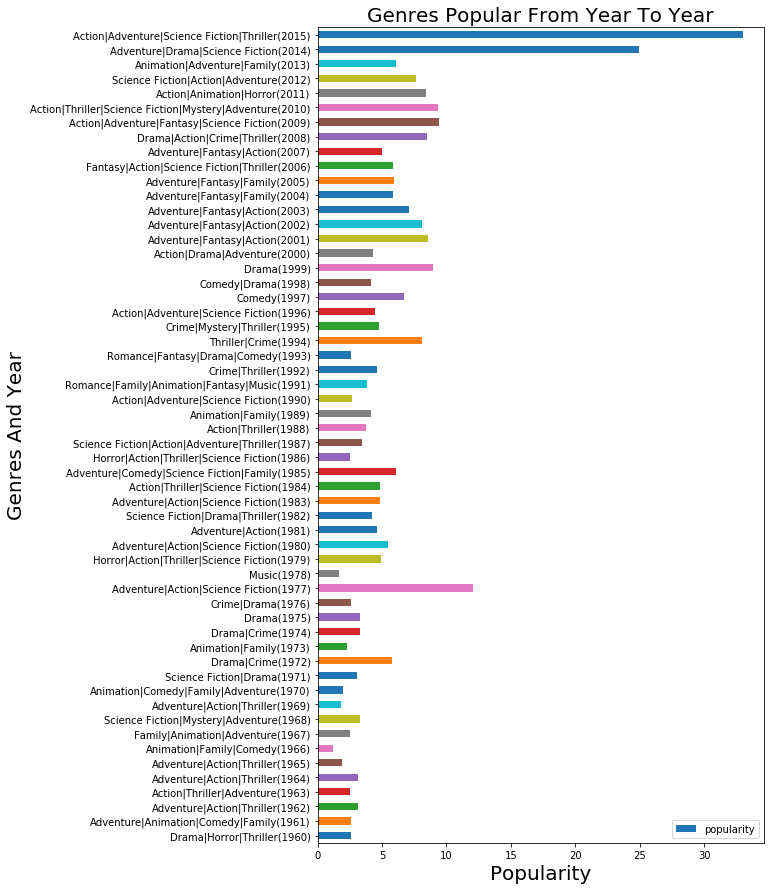

In [36]:
# Chart barh show genres and years most popular from year to year
df_popular_gr.plot(x = 'genres_year', y = 'popularity',kind = 'barh', figsize = (8, 15));
plt.ylabel('Genres And Year', fontsize = 20);
plt.xlabel('Popularity', fontsize = 20);
plt.title('Genres Popular From Year To Year', fontsize = 20);

### Summary chart:
Chart show:
* Genres most popular in year.
* Vertical include name genres(year) from year 1960 - 2015
* Horizontal include popularity of genres


### Conclusion for Research Question 1

* Popular movie genres over the years are evenly distributed.
* Particularly from 2001 to 2003, the Adventure, Fantasy, and Action genres were the most popular.
* Particularly from 2004 to 2005, the Adventure, Fantasy, and Family genres were the most popular.
* From 1960 - 2013 the popularity of the genres was not high, until 2014-2015, the popularity increased, maybe the manufacturer has promoted marketing to attract the audience.

### Research Question 2 : What kinds of properties are associated with movies that have high revenues?

In [19]:
# Add new column income, income_multiplier drop value inf
df['income'] = df['revenue_adj'] - df['budget_adj']
df['income_multiplier'] = df['revenue_adj']/df['budget_adj']
df['income_multiplier'].replace([np.inf, -np.inf], np.nan, inplace=True)
df

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,income,income_multiplier
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,2.522909
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,2.683984
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,10.340891
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,7.927628
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,3.661143e+08,3.947782
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,2.627551e+08,2.842603
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,4.483897e+08,5.512781
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,9.961120e+08,15.631499
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,6.244116e+08,4.878335


In [20]:
df.dropna(inplace = True)
df.shape

(5157, 15)

In [21]:
df

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,income,income_multiplier
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,2.522909
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,2.683984
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,10.340891
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,7.927628
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,3.661143e+08,3.947782
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,2.627551e+08,2.842603
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,4.483897e+08,5.512781
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,9.961120e+08,15.631499
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,6.244116e+08,4.878335


In [22]:
# Get value max of income_multiplier
df.income_multiplier.max()

1018619.2831858438

In [23]:
# Show record has value income_multiplier.max()
df[df['income_multiplier'] == df.income_multiplier.max()]

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,income,income_multiplier
10495,0.772494,113,115103979,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,113,Adventure|Drama|Action|Romance|Family,6/18/86,211,5.8,1986,224.802924,2.289886e+08,2.289884e+08,1.018619e+06


In [24]:
# Show top 100 movie has revenue most high
df_top = df.sort_values(by = ['revenue_adj', 'income'], ascending = False).head(100)
df_top

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,income,income_multiplier
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09,11.736312
1329,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,121,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09,70.490728
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09,9.225171
10594,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,122,Drama|Horror|Thriller,12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09,2.128036e+09,55.163268
9806,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,124,Horror|Thriller|Adventure,6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09,1.878643e+09,67.236286
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,10.340891
8889,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,115,Science Fiction|Adventure|Family|Fantasy,4/3/82,1830,7.2,1982,2.372625e+07,1.791694e+09,1.767968e+09,75.515291
8094,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,114,Crime|Drama|Mystery|Thriller|Action,7/28/95,201,5.6,1995,3.148127e+07,1.583050e+09,1.551568e+09,50.285439
10110,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,79,Adventure|Animation|Comedy|Family,1/25/61,913,6.6,1961,2.917944e+07,1.574815e+09,1.545635e+09,53.970003
4361,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,143,Science Fiction|Action|Adventure,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09,1.234248e+09,6.907081


In [25]:
# Check average vote_average
df_top.vote_average.mean()

6.9660000000000002

In [26]:
# Count the number of times the actor appeared
df_top.cast.value_counts()

Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                      3
Mike Myers|Eddie Murphy|Cameron Diaz|Julie Andrews|Antonio Banderas                   2
Ewan McGregor|Natalie Portman|Hayden Christensen|Ian McDiarmid|Samuel L. Jackson      2
Martin Freeman|Ian McKellen|Richard Armitage|Ken Stott|Graham McTavish                2
Mark Hamill|Harrison Ford|Carrie Fisher|Billy Dee Williams|Anthony Daniels            2
Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen Page|Tom Hardy|Ken Watanabe              1
Paul Newman|Robert Redford|Robert Shaw|Charles Durning|Ray Walston                    1
Tom Hanks|Audrey Tautou|Ian McKellen|Paul Bettany|Jean Reno                           1
Tobey Maguire|Kirsten Dunst|James Franco|Thomas Haden Church|Topher Grace             1
Christian Bale|Michael Caine|Heath Ledger|Aaron Eckhart|Gary Oldman                   1
Julie Andrews|Christopher Plummer|Eleanor Parker|Richard Haydn|Peggy Wood             1
Daniel Radcliffe|Rupert Grint|Em

In [27]:
# Count the number of times the genres appeared
df_top.genres.value_counts()

Adventure|Fantasy|Action                             7
Adventure|Fantasy|Family                             6
Adventure|Action|Science Fiction                     5
Action|Adventure|Science Fiction                     4
Adventure|Action|Thriller                            3
Adventure|Action                                     3
Adventure|Family|Fantasy                             2
Fantasy|Action                                       2
Adventure|Fantasy                                    2
Adventure|Fantasy|Drama|Romance                      2
Animation|Comedy|Family|Adventure                    2
Science Fiction|Action|Adventure                     2
Drama|Romance                                        1
Family|Animation|Adventure                           1
Crime|Drama|Mystery|Thriller|Action                  1
Comedy|Animation|Family                              1
Comedy|Adventure|Fantasy|Animation|Family            1
Animation|Comedy|Family                              1
Adventure|

In [28]:
# Top 10 movies has revenue most high
df_revenue = df_top.head(10)
df_revenue

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,income,income_multiplier
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09,11.736312
1329,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,121,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09,70.490728
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09,9.225171
10594,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,122,Drama|Horror|Thriller,12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09,2.128036e+09,55.163268
9806,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,124,Horror|Thriller|Adventure,6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09,1.878643e+09,67.236286
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,10.340891
8889,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,115,Science Fiction|Adventure|Family|Fantasy,4/3/82,1830,7.2,1982,2.372625e+07,1.791694e+09,1.767968e+09,75.515291
8094,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,114,Crime|Drama|Mystery|Thriller|Action,7/28/95,201,5.6,1995,3.148127e+07,1.583050e+09,1.551568e+09,50.285439
10110,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,79,Adventure|Animation|Comedy|Family,1/25/61,913,6.6,1961,2.917944e+07,1.574815e+09,1.545635e+09,53.970003
4361,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,143,Science Fiction|Action|Adventure,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09,1.234248e+09,6.907081


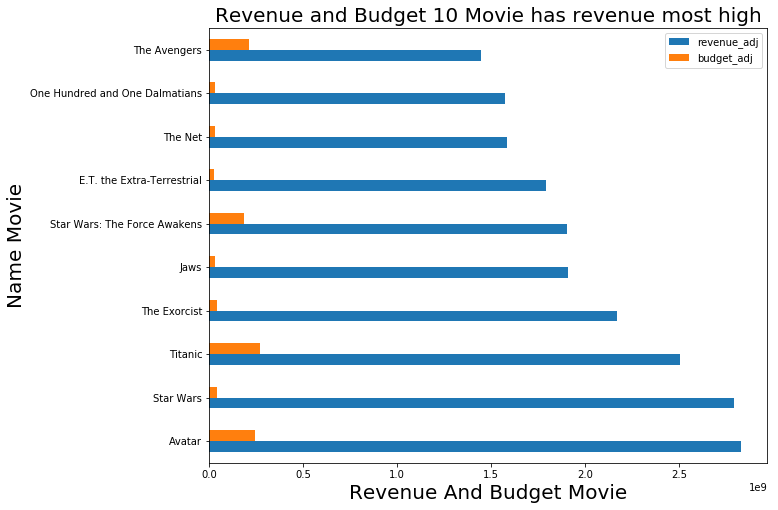

In [29]:
### Show chart barh include name movie, revenue, budget
df_revenue.plot(x = 'original_title', y = ['revenue_adj', 'budget_adj'],kind = 'barh', figsize = (10, 8));
plt.ylabel('Name Movie', fontsize = 20);
plt.xlabel('Revenue And Budget Movie', fontsize = 20);
plt.title('Revenue and Budget 10 Movie has revenue most high', fontsize = 20);

### Summary chart:
Chart barh show:
* 10 Movies has revenue most high.
* Vertical include name movies
* Horizontal include revenue and budget of movies

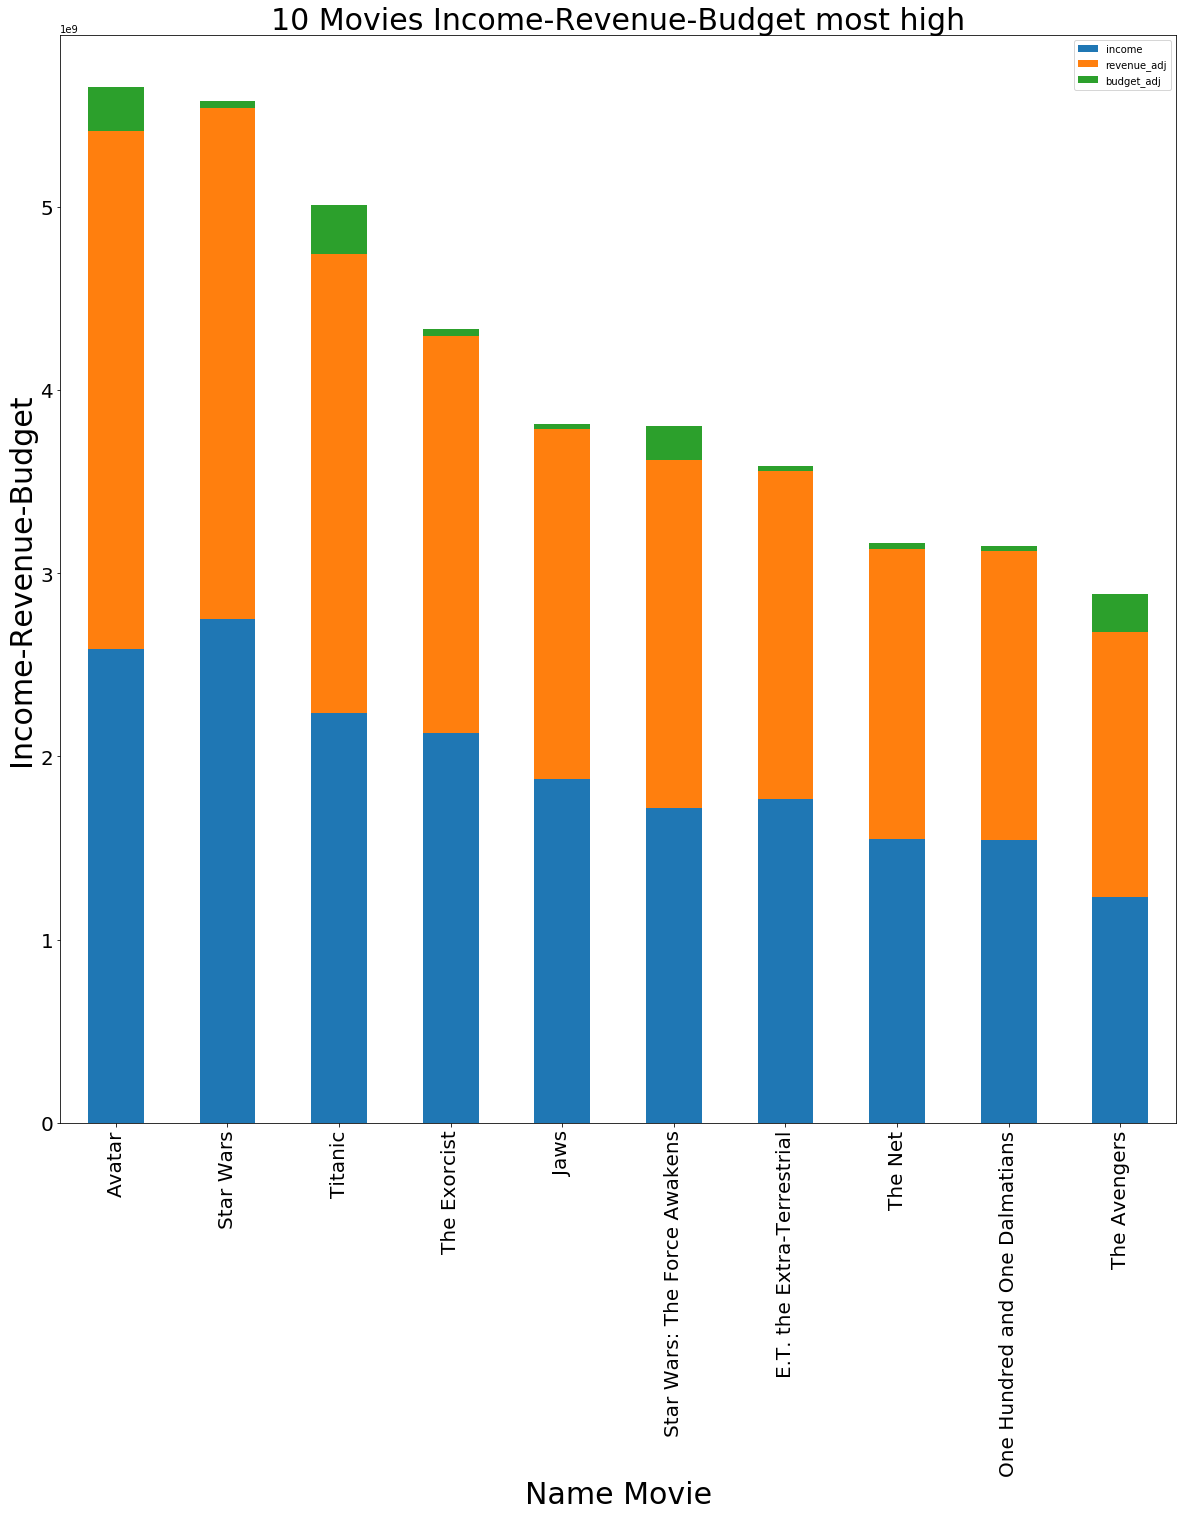

In [30]:
### Show chart bar include name movie, revenue, budget, income
df_revenue.plot(x = 'original_title', y = ['income','revenue_adj', 'budget_adj'], 
                stacked = True, kind = 'bar', figsize = (20, 20), fontsize = 20);
plt.ylabel('Income-Revenue-Budget', fontsize = 30);
plt.xlabel('Name Movie', fontsize = 30);
plt.title('10 Movies Income-Revenue-Budget most high', fontsize = 30);

### Summary chart:
Chart bar stacked show:
* 10 Movies has revenue most high.
* Vertical include revenue and budget, income.
* Horizontal include name of movies

### Conclusion for Research Question 2

* With the above data, it is very difficult to draw conclusions about which properties are associated with high-grossing movies.
* Overall, high-grossing movies usually have high review scores, averaging > 6.9 imdb.
* Most of the genres is **Adventure**.
* The actors in the movie are famous people.
* There are high-grossing movies but after deducting the production fees, the revenue multiplier is not too high.
* **There is a special movie: The Karate Kid, Part II**.
    **Revenue multiplier: 1.018.619**

## Limitations

* The data has not been cleaned.
* There are still duplicate records.
* Null data, NaN pretty much.

## Conclusions

The conclusion for the analysis for each question has been outlined below.

**Which genres of the movies are the most popular from year to year?.**
* In general, the most popular movie genre over the years is Adventure, it is always in the cluster of popular genres.
* However, based on popularity alone, it is not possible to conclude that it is the most popular.

**What kinds of properties are associated with movies that have high revenues?**
* Based on the analyzed and rendered data, usually high grossing movies have high imdb scores > 6.9.
* The properties, actors, genres, ratings, ... also contribute a part to help the film achieve high revenue.
* But also appear low-imdb movies, actors are not famous, production costs are low, but the revenue is very high.
* In terms of value for money, revenue in the years < 2000 will be different from > 2000 if currency inflation is taken into account.

**Conclusion:**
* Overall based on the above data, we can analyze and answer the questions: Highest revenue?, best reviews?, most popular?, movie website?, details, cast...


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0